In [1]:
import numpy as np
import imageio.v3 as iio
import matplotlib.pyplot as plt

<class 'imageio.core.util.Array'>
(634, 800)
uint8
6
137
20.532529574132493


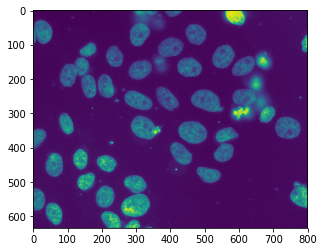

(50,) (51,)


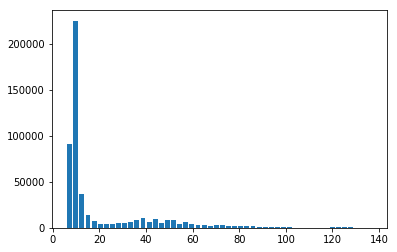

In [2]:
fName = "GFP_06-DAPI.tif"

I = iio.imread(fName, format='tif')
print(type(I)) # also numpy ndarray

print(I.shape) # height, width
print(I.dtype)
print(I.min())
print(I.max())
print(I.mean())

#plt.imshow(I, cmap='gray')
plt.imshow(I)
plt.show()      # show the window

hist, bins = np.histogram(I, bins=50)
print(hist.shape, bins.shape)

width = 0.8 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
#plt.bar(center, hist)
plt.show()

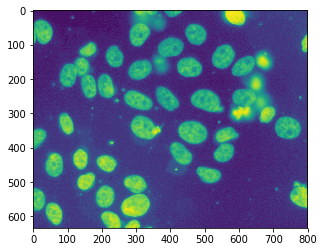

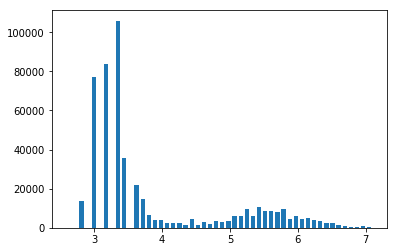

In [16]:
'''Map the intensity in the log2 '''
ILog = np.log2(I, dtype=np.float32)
plt.imshow(ILog)
plt.show()      # show the window
hist, bins = np.histogram(ILog, bins=50)

width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()


(634, 800)


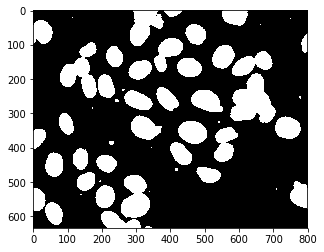

In [18]:
'''Global Threshold'''
idx = I > 20
print(idx.shape)

plt.imshow(idx, cmap="gray")
plt.show()

# 1. Choose a threshold 
#
#idx = ILog > ???       # Replace ??? with a meaningful value

# 2. Choose a colormap
# https://matplotlib.org/tutorials/colors/colormaps.html
#
#plt.imshow(idx, cmap='?????')  # Replace ????? with a colormap name
#plt.show()

In [5]:
'''Report Area and Intensity in Segmentation Mask'''
nPixels    = len(I[idx])
PercentArea =  100.0 * float(nPixels) / float(I.size) 
print("Number of Pixels in Mask: ", nPixels)
print("Percent Area: ",             PercentArea)

print("Mean Intensity in Mask: ", I[idx].mean())
print("Max Intensity in Mask: ",  I[idx].max())
print("Min Intensity in Mask: ",  I[idx].min())

Number of Pixels in Mask:  131296
Percent Area:  25.886435331230285
Mean Intensity in Mask:  50.78243053863027
Max Intensity in Mask:  137
Min Intensity in Mask:  21


Number of elements:  61


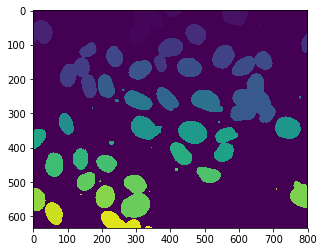

In [6]:
from scipy.ndimage import measurements
# https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.ndimage.measurements.label.html

ILabel, nFeatures = measurements.label(idx)
print("Number of elements: ", nFeatures)
plt.imshow(ILabel)
plt.show()

In [11]:
'''Report Intensity Per Object'''
cell_sizes = np.zeros(nFeatures)
for k in range(nFeatures):
    idx_k_cell = (ILabel == k)
    cell_sizes[k] = idx_k_cell.sum()
    print("Cell: ", k, " Mean: ", I[idx_k_cell].mean(), " Number of pixels: ", cell_sizes[k])

Cell:  0  Mean:  9.966823976334384  Number of pixels:  375904.0
Cell:  1  Mean:  41.96336499321574  Number of pixels:  6633.0
Cell:  2  Mean:  38.03718459495352  Number of pixels:  753.0
Cell:  3  Mean:  90.97310513447432  Number of pixels:  2863.0
Cell:  4  Mean:  23.75  Number of pixels:  8.0
Cell:  5  Mean:  26.5  Number of pixels:  8.0
Cell:  6  Mean:  49.81197900586601  Number of pixels:  3239.0
Cell:  7  Mean:  28.181818181818183  Number of pixels:  11.0
Cell:  8  Mean:  37.28561202576951  Number of pixels:  2794.0
Cell:  9  Mean:  71.76076555023923  Number of pixels:  836.0
Cell:  10  Mean:  33.653238033354995  Number of pixels:  4617.0
Cell:  11  Mean:  45.88764705882353  Number of pixels:  8500.0
Cell:  12  Mean:  39.870435806831566  Number of pixels:  3396.0
Cell:  13  Mean:  37.49408783783784  Number of pixels:  2368.0
Cell:  14  Mean:  46.17680986475736  Number of pixels:  5028.0
Cell:  15  Mean:  43.12593984962406  Number of pixels:  3192.0
Cell:  16  Mean:  38.79598662207

In [9]:
print(ILabel[50:100,50:100])

[[6 6 6 ... 0 0 0]
 [6 6 6 ... 0 0 0]
 [6 6 6 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(634, 800)
3239
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61]
[375904   6633    753   2863      8      8   3239     11   2794    836
   4617   8500   3396   2368   5028   3192   2990  11948   2683      1
   2925      1     39   4347   3345     36     88      2     16      7
   2042   4344   3845   4386     26   4688   1709    145   2934     12
   2252      4   2970   2345   2468     63   2304   7597     29   3135
   3019   2048     22     11     21      1   2582      3   3523      1
      1     92]


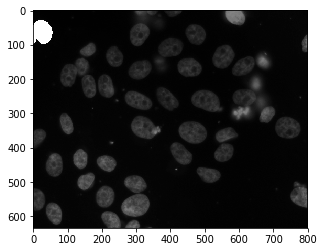

In [12]:
idxCell = (ILabel == 6)
print(idxCell.shape)
area_size = np.sum(idxCell)
print(area_size)

plt.imshow(ILabel, cmap='gray')

I[idxCell] = 255
plt.imshow(I, cmap='gray')

# 3.a Compute the area sizes of all the cells
# hint 1: use the numpy function unique to get the counts
#
# unique, counts = np.unique(ILabel, return_counts=True)
#
# hint 2: Label 0 may indicate background

# 3.b Find the cell with the largest area size in the image
# Change the intensities of that cell to 128
#
# I[ILabel == ???] = 128
# plt.imshow(I, cmap='gray')
